# Exercise 1: Python and sounds

This exercise aims to get familiar with some basic audio operations using Python. There are four parts to it: 1) Reading an audio file, 2) Basic operations with audio, 3) Python array indexing, and 4) Downsampling audio - Changing the sampling rate. 

Before doing the exercise, please go through the general information for all the exercises given in `README.txt` of the `notebooks` directory. 

### Relevant concepts

__Python:__ Python is a powerful and easy to learn programming language, which is used in a wide variety of application areas. More information in https://www.python.org/. We will use python in all the exercises and in this first one you will start learning about it by performing some basic operations with sound files. 

__Jupyter notebooks:__ Jupiter notebooks are interactive documents containing live code, equations, visualizations and narrative text. More information in https://jupyter.org/. It supports Python and all the exercises here use it.

__Wav file:__ The wav file format is a lossless format to store sounds on a hard drive. Each audio sample is stored as a 16 bit integer number (sometimes also as 24 bit integer or 32 bit float). In this course we will work with only one type of audio files. All the sound files we use in the assignments should be wav files that are mono (one channel), in which the samples are stored in 16 bits, and that use (most of the time) the sampling rate of 44100 Hz. Once read into python, the samples will be converted to floating point values with a range from -1 to 1, resulting in a one-dimensional array of floating point values.

## Part 1 - Reading in an audio file
The `read_audio_samples()` function bellow should read an audio file and return a specified number of consecutive samples of the file starting at a given sample. 

The input to the function is the file name (including the path), plus the location of first sample and the number of consecutive samples to take, and the output should be a numpy array.

If you use the `wavread()` function from the `utilFunctions` module available in the `software/models` directory, the input samples will be automatically converted to a numpy array of floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [2]:
import sys
import os
import numpy as np

#Additional libraries
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, lfilter, freqz


sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite

In [3]:
# E1 - 1.1: Complete the read_audio_samples() function

def read_audio_samples(input_file, first_sample=50001, num_samples=10):
    """Read num_samples samples from an audio file starting at sample first_sample
    
    Args:
        input_file (str): path of a wav file      
    
    Returns:
        np.array: numpy array containing the selected samples
    
    """
    
    ### Your code here
    sr, y = wavread(input_file)
    return(y[first_sample-1: first_sample-1 + num_samples])

You can use as input the sound files from the sounds directory, thus using a relative path to it. If you run the `read_audio_samples()` function using the `piano.wav` sound file as input, with the default arguments, it should return the following samples:
```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997, 0.00769066, 0.02319407, 0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

In [4]:
# E1 - 1.2: Call read_audio_samples() with the proposed input sound and default arguments

### Your code here
read_audio_samples("../sounds/piano.wav")

array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,
        0.02319407,  0.03503525,  0.04309214,  0.04626606,  0.0441908 ],
      dtype=float32)

## Part 2 - Basic operations with audio

The function `minMaxAudio()` should read an audio file and return the minimum and  maximum values of the audio samples in that file. The input to the function is the wav file name (including the path) and the output should be two floating point values returned as a tuple.

In [5]:
# E1 - 2.1: Complete function minMaxAudio()

def min_max_audio(input_file):
    """Compute the minimum and maximum values of the audio samples in the input file
    
    Args:
        inputFile(str): file name of the wav file (including path)
    
    Returns:
        tuple: minimum and maximum value of the audio samples, like: (min_val, max_val)
    """
    ### Your code here
    sr, y = wavread(input_file)
    max_val, min_val = np.max(y), np.min(y)
    return (min_val, max_val)


If you run `min_max_audio()` using `oboe-A4.wav` as input, it should return the following output: 

```
(-0.83486432, 0.56501967)
```

In [6]:
# E1 - 2.2: Plot input sound with x-axis in seconds, and call min_max_audio() with the proposed sound file

### Your code here
min_max_audio("../sounds/oboe-A4.wav")

(-0.8348643, 0.56501967)

## Part 3 - Python array indexing

For the function `hop_samples()`, given a numpy array `x`, it should return every Mth element of `x`, starting from the first element. The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of elements in `x`. The output of this function should be a numpy array.

In [7]:
# E1 - 3.1: Complete the function hop_samples()

def hop_samples(x, M):
    """Return every Mth element of the input array
    
    Args:
        x(np.array): input numpy array
        M(int): hop size (positive integer)
    
    Returns:
        np.array: array containing every Mth element in x, starting from the first element in x
    """
    ### Your code here
    return (x[0::M])



If you run the function`hop_samples()` with `x = np.arange(10)` and `M = 2` as inputs, it should return: 

```
array([0, 2, 4, 6, 8])
```

In [8]:
# E1 - 3.2: Plot input array, call hop_samples() with proposed input, and plot output array

### Your code here
x = np.arange(10)
M = 2

print("Original array:")
print(x,"\n")

every_mth = hop_samples(x, M)

print("Every Mth element in the array:")
print(every_mth)

Original array:
[0 1 2 3 4 5 6 7 8 9] 

Every Mth element in the array:
[0 2 4 6 8]


## Part 4 - Downsampling


One of the required processes to represent an analog signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. Here you will learn a simple way of changing the original sampling rate of a sound to a lower sampling rate, and will learn the implications it has in the audio quality.

The function `down_sample_audio()` has as input an audio file with a given sampling rate, it should apply downsampling by a factor of `M` and return a down-sampled version of the input samples. The sampling rates and downsampling factors to use have to be integer values.

From the output samples if you need to create a wav audio file from an array, you can use the `wavwrite()` function from the `utilFunctions.py` module. However, in this exercise there is no need to write an audio file, we will be able to hear the sound without creating a file, just playing the array of samples.

In [9]:
# E1 - 4.1: Complete function down_sample_audio()

def down_sample_audio(input_file, M):
    """Downsample by a factor of M the input signal
    
    Args:
        input_file(str): file name of the wav file (including path)
        M(int): downsampling factor (positive integer)
        
    Returns:
        tuple: input samples (np.array), original sampling rate (int), down-sampled signal (np.array), 
               and new sampling rate (int), like: (x, fs, y, fs_new) 
    """
    ### Your code here

    #Check if M is an integer
    M_type = type(M)
    if M_type != int:
        raise ValueError("The value of M is expected to be int but is found to be {}".format(M_type))

    #Downsampling
    sr, y = wavread(input_file)
    y_downsampled = hop_samples(y, M)
    return y_downsampled


Test cases for `down_sample_audio()`:

_Test Case 1:_ Use the file from the sounds directory `vibraphone-C6.wav` and a downsampling factor of `M=14`.

_Test Case 2:_ Use the  file from the sounds directory `sawtooth-440.wav` and a downsampling factor of `M=14`.

To play the output samples, import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=y, rate=fs_new))`. To visualize the output samples import the `matplotlib.pyplot` package and use `plt.plot(x)`.

You can find some related information in https://en.wikipedia.org/wiki/Downsampling_(signal_processing)

In [20]:
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})


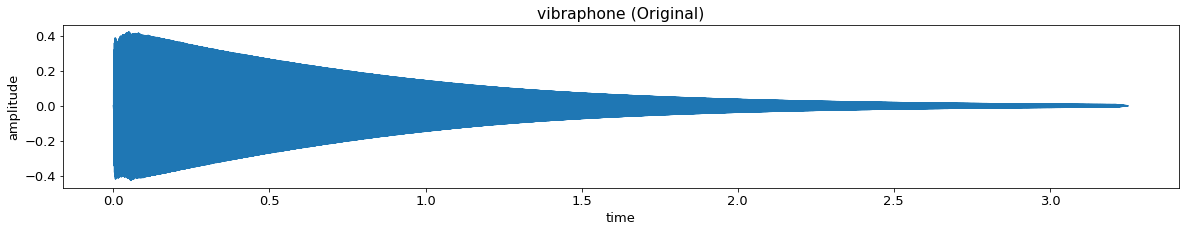

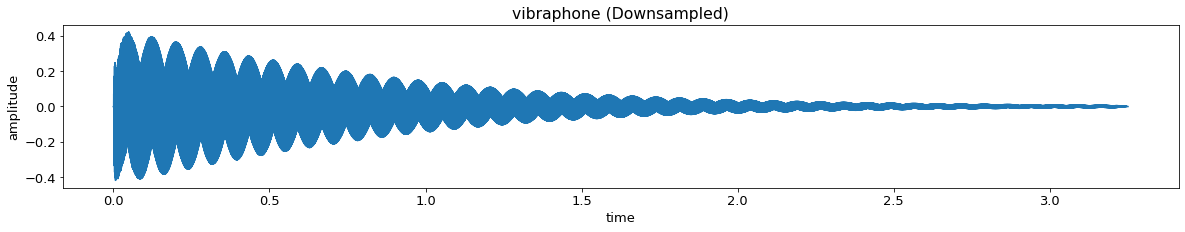

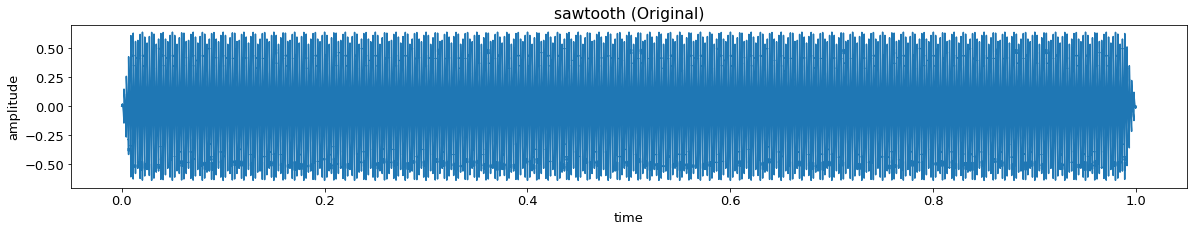

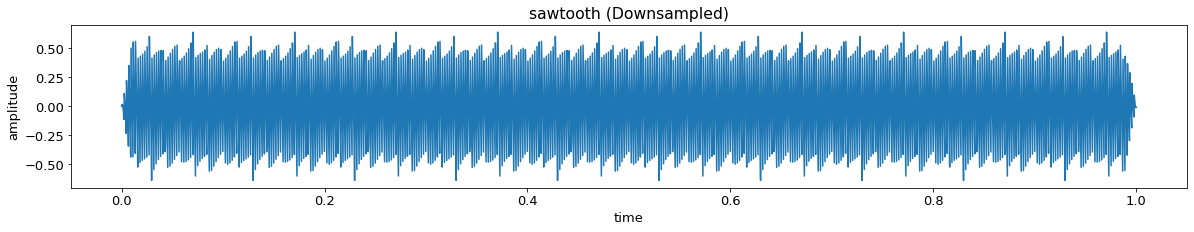

In [21]:
# E1 - 4.2: Plot and play input sounds, call the function down_sample_audio() for the two test cases, 
# and plot and play the output sounds. 

### Your code here

#Downsampling factor 
M = 14

#Function to plot audio
def plot_audio(sr, y, title, xlimit= 0):

    time = np.linspace(0, len(y)/sr, len(y))
    plt.figure(figsize=(20, 3))
    plt.plot(time, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.title(title)
    if xlimit:
        plt.xlim( xlimit)
    
    
    
#Test Case 1
sr, y1 = wavread("../sounds/vibraphone-C6.wav")
plot_audio(sr, y1, "vibraphone (Original)")
ipd.display(ipd.Audio(data=y1, rate=sr))

#Downsample
sr_downsampled, y1_downsampled = sr/M, hop_samples(y1, M)
plot_audio(sr_downsampled, y1_downsampled,"vibraphone (Downsampled)")
ipd.display(ipd.Audio(data=y1_downsampled, rate=sr_downsampled))

#Test Case 2
sr, y2 = wavread("../sounds/sawtooth-440.wav")
plot_audio(sr, y2, "sawtooth (Original)")
ipd.display(ipd.Audio(data=y2, rate=sr))


#Downsample
sr_downsampled, y2_downsampled = sr/M, hop_samples(y2, M)

plot_audio(sr_downsampled, y2_downsampled, "sawtooth (Downsampled)")
ipd.display(ipd.Audio(data=y2_downsampled, rate=sr_downsampled))


## Plotting just the first few samples

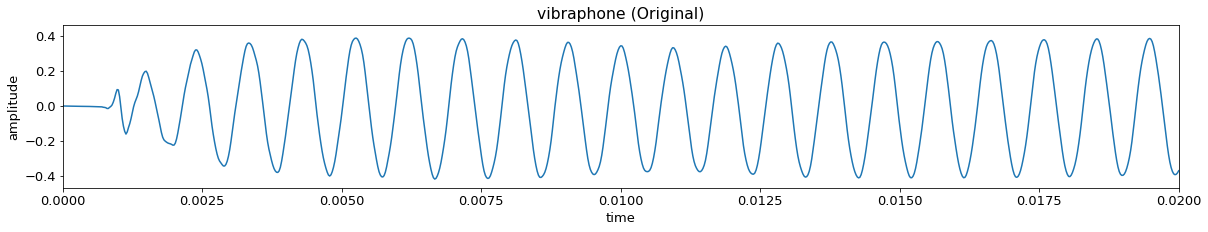

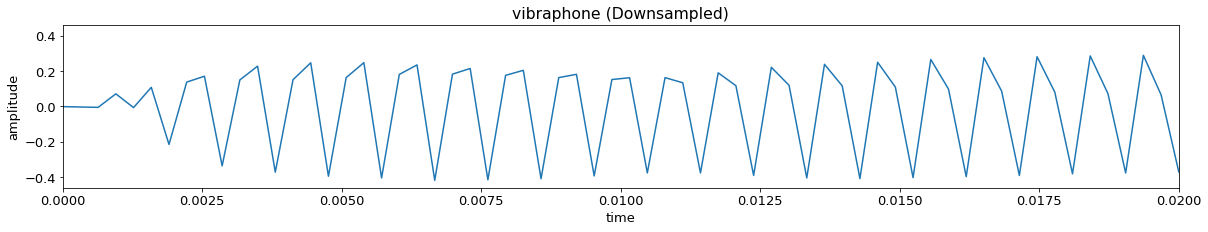

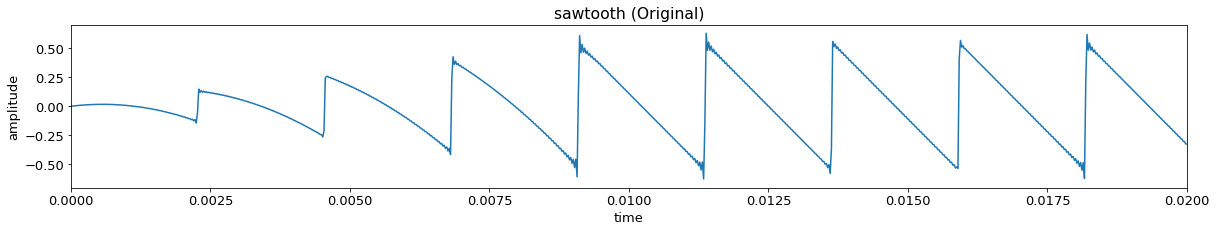

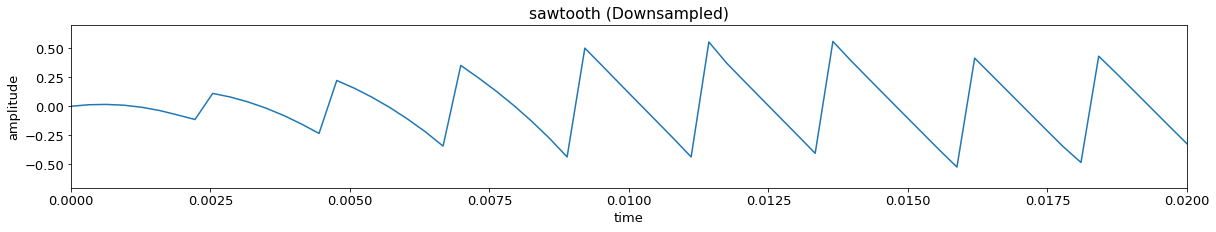

In [22]:
# The first 0.02 seconds
plot_audio(sr, y1, "vibraphone (Original)", (0,0.02))
plot_audio(sr_downsampled, y1_downsampled, "vibraphone (Downsampled)", (0,0.02))
plot_audio(sr, y2, "sawtooth (Original)", (0,0.02))
plot_audio(sr_downsampled, y2_downsampled, "sawtooth (Downsampled)", (0,0.02))



## Analysing the frequency content of the signals

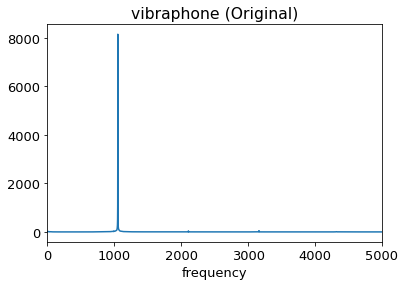

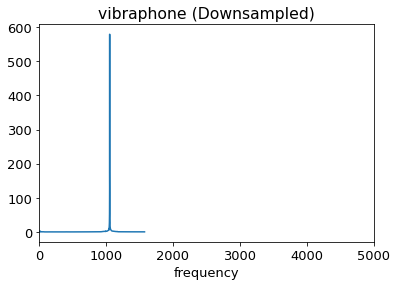

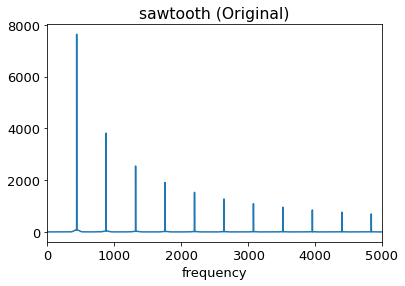

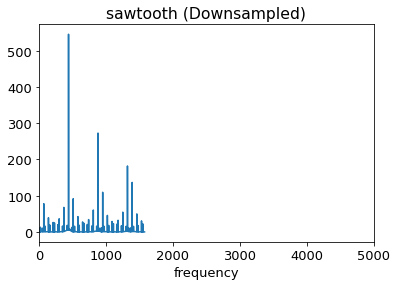

In [23]:
def plot_fft(sr, y, title, x_limit = 5000):
    yf = rfft(y)
    xf = rfftfreq(len(y), 1 / sr)

    plt.plot(xf, np.abs(yf))
    plt.title(title)
    plt.xlim((0,x_limit))
    plt.xlabel("frequency")
    plt.show()

plot_fft(sr, y1, "vibraphone (Original)")
plot_fft(sr_downsampled, y1_downsampled, "vibraphone (Downsampled)")
plot_fft(sr, y2, "sawtooth (Original)")
plot_fft(sr_downsampled, y2_downsampled, "sawtooth (Downsampled)")


In [26]:
# E1 - 4.3: Explain the results of part 4. What happened to the output signals compared to the input ones? 
# Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

"""
The output signal is perceptively unaffected in the case of the vibraphone, while it is significantly altered
for the sawtooth signal. Visually, we can see that the output after downsampling is not as smooth and continuous 
as the input. But the difference is only audible in the case of the sawtooth input. To see why that is the case, 
the frequencies contained in the signal have been visualised and it is observed that the vibraphone signal doesn't
change significantly upon downsampling while the sawtooth does. 

The highest frequency that can be represented in a digital signal depends on the sampling rate and is numerically 
half of the sampling rate. For the case of the vibraphone, there is only one dominant frequency in the signal and 
that frequency is smaller than half of the reduced sampling rate after downsampling. So the signal can be successfully 
downsampled to the desired sampling rate. 

In the case of the sawtooth, there are many frequencies that are higher than the nyquist frequency and are lost in 
downsampling. Also, downsampling introduces many additional frequencies perhaps because the frequencies that are 
larger than the nyquist frequencies are registered as the frequency divided by some integer, for example 3000 Hz in the
original signal can become 1500 (3000/2) or 1000 (3000/3) in the downsampled signal. The discarding of high frequency 
components combined with the introduction of additional lower frequency components significantly reduces the quality of
the signal. 

To avoid damaging the signal while downsampling, a more conservative downsampling factor can be used so that less of
the high frequency content is lost in downsampling. Also, after the downsampling factor has been selected, the input
signal can be low-pass-filtered at the nyquist frequency to remove any higher frequencies. These methods have been 
tested for the sawtooth signal in the cells below. 

"""
print("")

### Figuring out the ideal downsampling factor

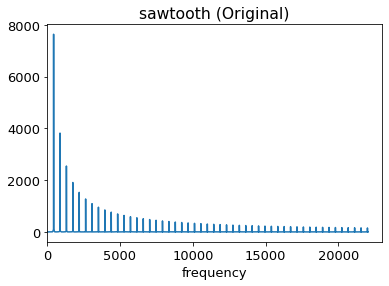

In [25]:
plot_fft(sr, y2, "sawtooth (Original)", 23000)

Since the sawtooth signal has frequencies going upto 21 KHz (half of the original sampling rate), any downsampling factor would lose high frequency content. So we'll have to low pass the signal before downsampling it. 

Chosing a lower downsampling factor, say 7, would require us to low pass at about 3 KHz. These parameters are used for downsampling and compared to the original signal in the cells below. 

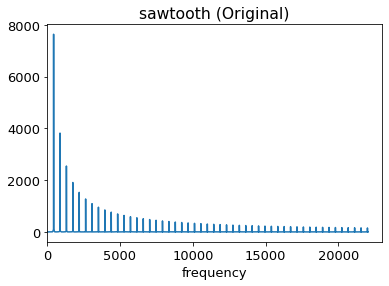

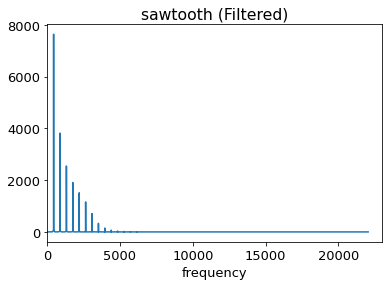

In [29]:
# Low pass the signal

def butter_lowpass(cutoff, sr, order=5):
    nyq = 0.5 * sr
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, sr, order=5):
    b, a = butter_lowpass(cutoff, sr, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
cutoff = 3000  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, sr, order)


# Filter the signal
y2_filtered = butter_lowpass_filter(y2, cutoff, sr, order)

plot_fft(sr, y2, "sawtooth (Original)", 23000)
plot_fft(sr, y2_filtered, "sawtooth (Filtered)", 23000)


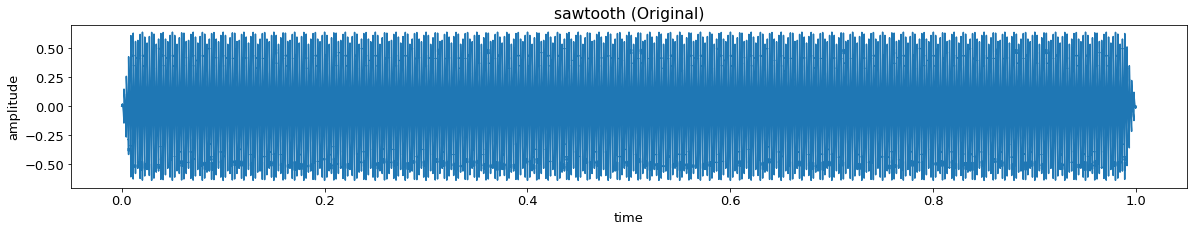

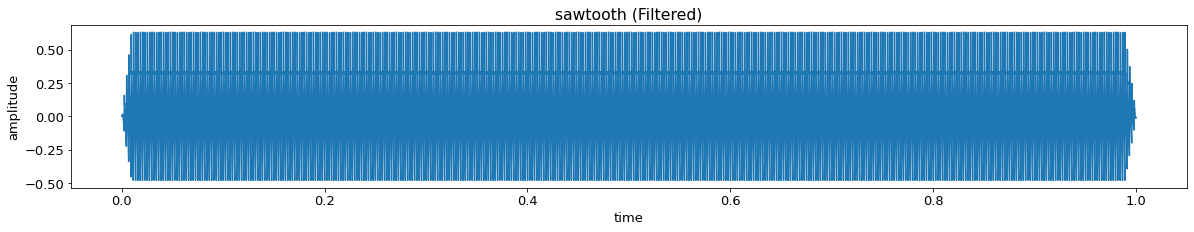

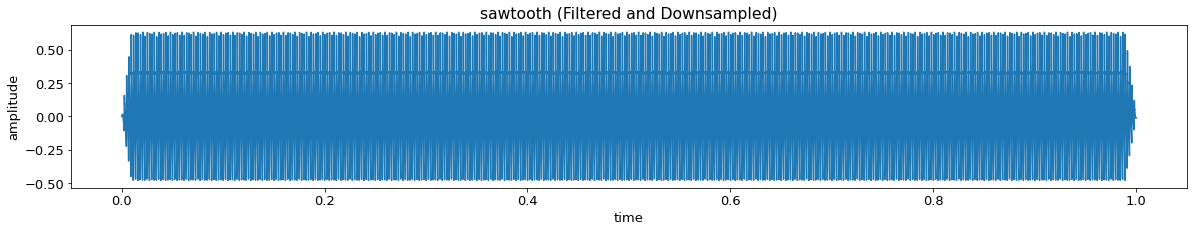

In [30]:
# Downsample and compare
M = 3
sr_filt_downsampled, y2_filt_downsampled = sr/M, hop_samples(y2_filtered, M)

#Comparison (Original vs Filtered vs Filtered and Downsampled)
plot_audio(sr, y2, "sawtooth (Original)")
ipd.display(ipd.Audio(data=y2, rate=sr))

plot_audio(sr, y2_filtered, "sawtooth (Filtered)")
ipd.display(ipd.Audio(data=y2_filtered, rate=sr))

plot_audio(sr_filt_downsampled, y2_filt_downsampled, "sawtooth (Filtered and Downsampled)")
ipd.display(ipd.Audio(data=y2_filt_downsampled, rate=sr_filt_downsampled))

Here, while there is a change in the sound when we low pass it at 3 KHz, the downsampling step has a negligible impact on the sound. Low passing the signal before downsampling preserves the characteristics of the sound much better than downsampling with the low pass filter.  